<a href="https://colab.research.google.com/github/lovepreetmultani/Anti-Money-Laundering/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import time
from datetime import datetime as dt
from sklearn.feature_selection import  f_classif, SelectKBest

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
fraud=pd.read_csv("drive/My Drive/Dissertation/Data-2-small.csv")

In [ ]:
fraud.head()

,tx_fraud,tx_amount,s_pagerank,s_label,s_min_send_tx,s_min_receieve_tx,s_max_send_tx,s_max_recieve_tx,s_avg_send_tx,s_avg_recieve_tx,...,r_label,r_min_send_tx,r_min_receieve_tx,r_max_send_tx,r_max_recieve_tx,r_avg_send_tx,r_avg_recieve_tx,r_cnt_recieve_tx,r_cnt_send_tx,r_timestamp
0,True,2661.05,1.64276,52429084,90.98,45.89,2661.05,2956.72,174.60600,314.35879,...,52429264,91.04,46.12,109.53,2661.05,99.75712,851.45423,26,52,1509580800
1,True,2661.05,0.89618,37749079,90.19,45.72,2661.05,2956.72,207.55542,437.18238,...,52429264,91.04,46.12,109.53,2661.05,99.75712,851.45423,26,52,1509321600
2,True,2844.06,0.70773,34603485,90.30,48.52,2844.06,54.41,159.08872,52.09875,...,47186571,90.69,45.27,2559.65,2844.06,238.81746,200.33864,103,71,1499731200
3,True,2523.37,2.55504,49283515,91.41,45.03,2523.37,2803.73,270.59857,139.48263,...,34603040,90.58,45.65,109.96,2662.20,99.81943,781.37258,31,35,1485043200
4,True,2745.06,1.35612,55574890,90.66,45.34,2745.06,2718.14,245.75222,320.09300,...,57672098,90.34,45.72,2470.55,2745.06,314.67291,291.58139,79,55,1513987200


In [ ]:
fraud.columns

Index(['tx_fraud', 'tx_amount', 's_pagerank', 's_label', 's_min_send_tx',
       's_min_receieve_tx', 's_max_send_tx', 's_max_recieve_tx',
       's_avg_send_tx', 's_avg_recieve_tx', 's_cnt_recieve_tx',
       's_cnt_send_tx', 's_timestamp', 'r_pagerank', 'r_label',
       'r_min_send_tx', 'r_min_receieve_tx', 'r_max_send_tx',
       'r_max_recieve_tx', 'r_avg_send_tx', 'r_avg_recieve_tx',
       'r_cnt_recieve_tx', 'r_cnt_send_tx', 'r_timestamp'],
      dtype='object')

In [ ]:
fraud.columns

Index(['tx_fraud', 'tx_amount', 's_pagerank', 's_label', 's_min_send_tx',
       's_min_receieve_tx', 's_max_send_tx', 's_max_recieve_tx',
       's_avg_send_tx', 's_avg_recieve_tx', 's_cnt_recieve_tx',
       's_cnt_send_tx', 's_timestamp', 'r_pagerank', 'r_label',
       'r_min_send_tx', 'r_min_receieve_tx', 'r_max_send_tx',
       'r_max_recieve_tx', 'r_avg_send_tx', 'r_avg_recieve_tx',
       'r_cnt_recieve_tx', 'r_cnt_send_tx', 'r_timestamp'],
      dtype='object')

In [ ]:
fraud.describe()

,tx_amount,s_pagerank,s_label,s_min_send_tx,s_min_receieve_tx,s_max_send_tx,s_max_recieve_tx,s_avg_send_tx,s_avg_recieve_tx,s_cnt_recieve_tx,...,r_label,r_min_send_tx,r_min_receieve_tx,r_max_send_tx,r_max_recieve_tx,r_avg_send_tx,r_avg_recieve_tx,r_cnt_recieve_tx,r_cnt_send_tx,r_timestamp
count,10007.000000,10007.000000,1.000700e+04,10007.000000,10007.000000,10007.000000,10007.000000,10007.000000,10007.000000,10007.000000,...,1.000700e+04,10007.000000,10007.000000,10007.000000,10007.000000,10007.000000,10007.000000,10007.000000,10007.000000,1.000700e+04
mean,474.883315,1.056894,4.235848e+07,49.798697,45.432130,2635.809532,2440.291683,284.613082,289.168261,44.876886,...,4.356898e+07,50.232612,45.280289,2514.060945,2599.913853,284.297503,302.584027,81.841211,43.657340,1.514402e+09
std,947.709546,0.735031,8.931131e+06,13.659489,0.561507,210.719696,687.354274,99.473687,125.068334,37.662278,...,1.074208e+07,14.290851,0.418649,566.978317,438.445767,114.301963,124.229533,81.050019,10.290154,1.800401e+07
min,45.000000,0.217220,3.355443e+07,45.000000,45.000000,108.490000,51.360000,98.760000,48.394170,3.000000,...,3.355443e+07,45.000000,45.000000,54.240000,52.410000,49.045560,48.140000,4.000000,3.000000,1.483229e+09
25%,48.130000,0.648510,3.565163e+07,45.070000,45.110000,2596.400000,2528.010000,213.906360,207.931720,23.000000,...,3.355454e+07,45.070000,45.040000,2572.325000,2624.790000,208.340360,229.339400,33.000000,39.000000,1.498781e+09
50%,51.180000,0.848030,3.774904e+07,45.180000,45.250000,2671.500000,2649.810000,274.420450,288.298810,35.000000,...,4.089482e+07,45.190000,45.140000,2663.460000,2699.940000,271.635870,291.145640,50.000000,45.000000,1.514506e+09
75%,54.210000,1.167860,4.928352e+07,45.490000,45.570000,2728.150000,2716.140000,346.938540,376.084590,52.000000,...,5.347742e+07,45.460000,45.350000,2717.990000,2731.680000,353.255950,355.087730,98.000000,50.000000,1.529971e+09
max,2996.940000,5.480010,6.606038e+07,103.150000,50.000000,2996.940000,2996.940000,742.248330,901.686500,244.000000,...,6.606064e+07,103.150000,51.170000,2996.940000,2996.940000,884.143850,1139.870000,507.000000,75.000000,1.545350e+09


In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10007 entries, 0 to 10006
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tx_fraud           10007 non-null  bool   
 1   tx_amount          10007 non-null  float64
 2   s_pagerank         10007 non-null  float64
 3   s_label            10007 non-null  int64  
 4   s_min_send_tx      10007 non-null  float64
 5   s_min_receieve_tx  10007 non-null  float64
 6   s_max_send_tx      10007 non-null  float64
 7   s_max_recieve_tx   10007 non-null  float64
 8   s_avg_send_tx      10007 non-null  float64
 9   s_avg_recieve_tx   10007 non-null  float64
 10  s_cnt_recieve_tx   10007 non-null  int64  
 11  s_cnt_send_tx      10007 non-null  int64  
 12  s_timestamp        10007 non-null  int64  
 13  r_pagerank         10007 non-null  float64
 14  r_label            10007 non-null  int64  
 15  r_min_send_tx      10007 non-null  float64
 16  r_min_receieve_tx  100

In [ ]:
# Print the number of duplicate rows
duplicates = fraud.duplicated()
print("Number of duplicate rows: ", duplicates.sum())

Number of duplicate rows:  0


In [ ]:
# To check the null values
fraud.isnull().sum()

tx_fraud             0
tx_amount            0
s_pagerank           0
s_label              0
s_min_send_tx        0
s_min_receieve_tx    0
s_max_send_tx        0
s_max_recieve_tx     0
s_avg_send_tx        0
s_avg_recieve_tx     0
s_cnt_recieve_tx     0
s_cnt_send_tx        0
s_timestamp          0
r_pagerank           0
r_label              0
r_min_send_tx        0
r_min_receieve_tx    0
r_max_send_tx        0
r_max_recieve_tx     0
r_avg_send_tx        0
r_avg_recieve_tx     0
r_cnt_recieve_tx     0
r_cnt_send_tx        0
r_timestamp          0
dtype: int64

<Axes: >

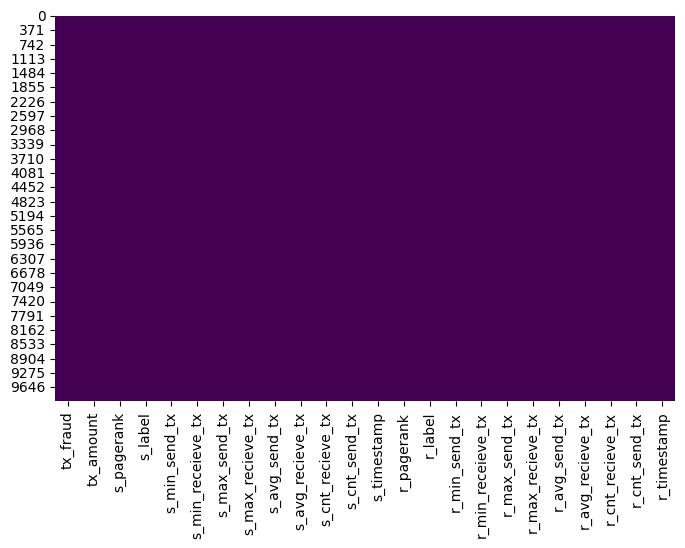

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(fraud.isnull(),cbar=False,cmap='viridis')

In [ ]:
#Mean
print("  mean  ".center(50,"#"))
print("\n")
print(fraud.mean())

#####################  mean  #####################


tx_fraud             8.064355e-02
tx_amount            4.748833e+02
s_pagerank           1.056894e+00
s_label              4.235848e+07
s_min_send_tx        4.979870e+01
s_min_receieve_tx    4.543213e+01
s_max_send_tx        2.635810e+03
s_max_recieve_tx     2.440292e+03
s_avg_send_tx        2.846131e+02
s_avg_recieve_tx     2.891683e+02
s_cnt_recieve_tx     4.487689e+01
s_cnt_send_tx        4.490017e+01
s_timestamp          1.514402e+09
r_pagerank           1.726709e+00
r_label              4.356898e+07
r_min_send_tx        5.023261e+01
r_min_receieve_tx    4.528029e+01
r_max_send_tx        2.514061e+03
r_max_recieve_tx     2.599914e+03
r_avg_send_tx        2.842975e+02
r_avg_recieve_tx     3.025840e+02
r_cnt_recieve_tx     8.184121e+01
r_cnt_send_tx        4.365734e+01
r_timestamp          1.514402e+09
dtype: float64


In [ ]:
#Median
print("  mean  ".center(50,"#"))
print("\n")
print(fraud.median())

#####################  mean  #####################


tx_fraud             0.000000e+00
tx_amount            5.118000e+01
s_pagerank           8.480300e-01
s_label              3.774904e+07
s_min_send_tx        4.518000e+01
s_min_receieve_tx    4.525000e+01
s_max_send_tx        2.671500e+03
s_max_recieve_tx     2.649810e+03
s_avg_send_tx        2.744205e+02
s_avg_recieve_tx     2.882988e+02
s_cnt_recieve_tx     3.500000e+01
s_cnt_send_tx        4.500000e+01
s_timestamp          1.514506e+09
r_pagerank           1.173460e+00
r_label              4.089482e+07
r_min_send_tx        4.519000e+01
r_min_receieve_tx    4.514000e+01
r_max_send_tx        2.663460e+03
r_max_recieve_tx     2.699940e+03
r_avg_send_tx        2.716359e+02
r_avg_recieve_tx     2.911456e+02
r_cnt_recieve_tx     5.000000e+01
r_cnt_send_tx        4.500000e+01
r_timestamp          1.514506e+09
dtype: float64


In [ ]:
#Mode
print("  mean  ".center(50,"#"))
print("\n")
print(fraud.mode())

#####################  mean  #####################


  tx_fraud  tx_amount  s_pagerank     s_label  s_min_send_tx  \
0    False      49.54     0.76651  36700179.0          45.03   
1      NaN      53.16         NaN         NaN            NaN   

   s_min_receieve_tx  s_max_send_tx  s_max_recieve_tx  s_avg_send_tx  \
0              45.18        2515.83           2749.05      346.27381   
1                NaN        2661.05               NaN            NaN   

   s_avg_recieve_tx  ...     r_label  r_min_send_tx  r_min_receieve_tx  \
0            330.07  ...  47186390.0           45.0               45.0   
1               NaN  ...         NaN            NaN                NaN   

   r_max_send_tx  r_max_recieve_tx  r_avg_send_tx  r_avg_recieve_tx  \
0        2606.88           2722.27      125.25882         304.51714   
1            NaN               NaN            NaN               NaN   

   r_cnt_recieve_tx  r_cnt_send_tx   r_timestamp  
0              37.0           46.0  1.485648e+09 

In [ ]:
fraud['tx_fraud'].value_counts()

False    9200
True      807
Name: tx_fraud, dtype: int64

([<matplotlib.patches.Wedge at 0x7f8d9cc1bf70>,
 [Text(-1.0648862397143757, 0.27571234369715397, ''),
  Text(1.0648862526214007, -0.2757122938462312, '')],
 [Text(-0.5808470398442048, 0.15038855110753852, '91.94%'),
  Text(0.5808470468844003, -0.1503885239161261, '8.06%')])

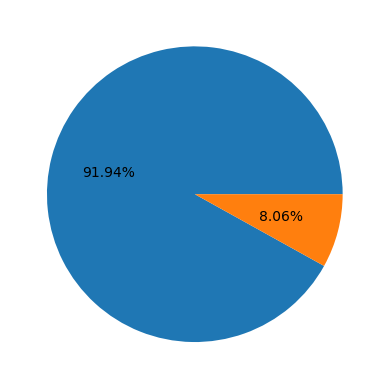

In [ ]:
plt.pie(fraud['tx_fraud'].value_counts(),  autopct='%.2f%%')

<Axes: >

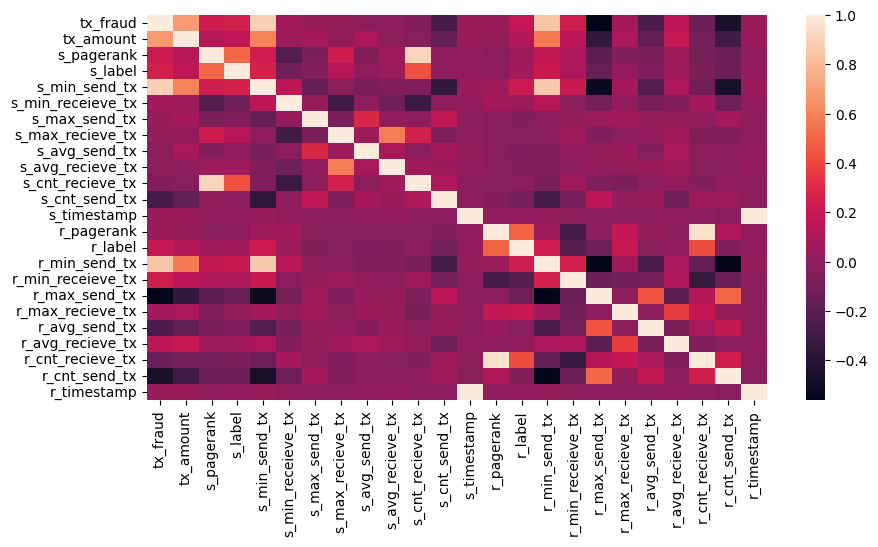

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(fraud.corr(),annot=False)

In [ ]:
sns.pairplot(fraud, diag_kind='kde',
             plot_kws={'alpha': 0.2, 's': 10},
             diag_kws={'bw_adjust': 1.5, 'color': 'blue'},
             palette='coolwarm')

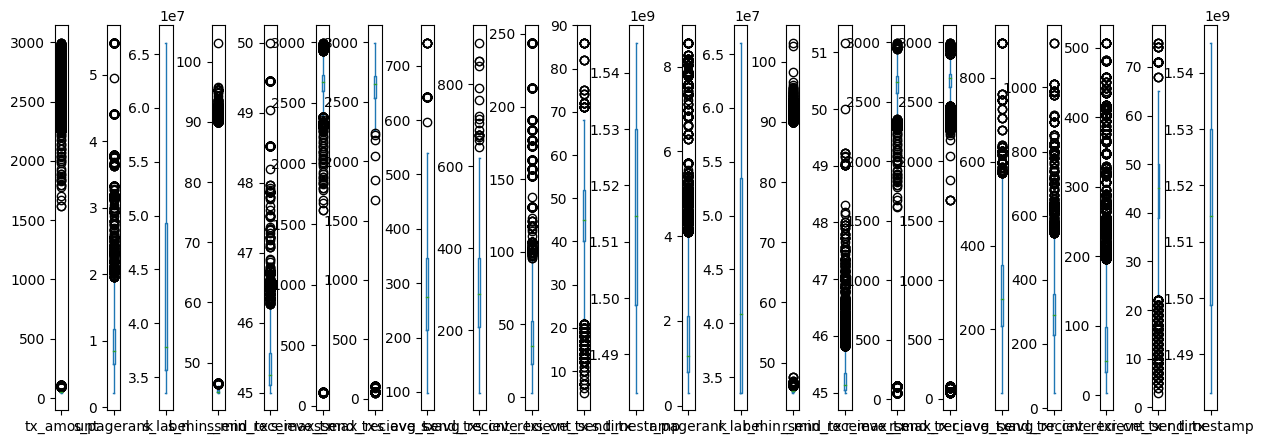

In [ ]:
#to find wheather it has outlier using box plot
fraud.plot(kind = 'box', subplots = True, sharey = False, figsize = (15, 5))
# Increase spacing between subplots
plt.subplots_adjust(wspace = 2.95)
plt.show()

In [ ]:
fraud.head()

,tx_fraud,tx_amount,s_pagerank,s_label,s_min_send_tx,s_min_receieve_tx,s_max_send_tx,s_max_recieve_tx,s_avg_send_tx,s_avg_recieve_tx,...,r_label,r_min_send_tx,r_min_receieve_tx,r_max_send_tx,r_max_recieve_tx,r_avg_send_tx,r_avg_recieve_tx,r_cnt_recieve_tx,r_cnt_send_tx,r_timestamp
0,True,2661.05,1.64276,52429084,90.98,45.89,2661.05,2956.72,174.60600,314.35879,...,52429264,91.04,46.12,109.53,2661.05,99.75712,851.45423,26,52,1509580800
1,True,2661.05,0.89618,37749079,90.19,45.72,2661.05,2956.72,207.55542,437.18238,...,52429264,91.04,46.12,109.53,2661.05,99.75712,851.45423,26,52,1509321600
2,True,2844.06,0.70773,34603485,90.30,48.52,2844.06,54.41,159.08872,52.09875,...,47186571,90.69,45.27,2559.65,2844.06,238.81746,200.33864,103,71,1499731200
3,True,2523.37,2.55504,49283515,91.41,45.03,2523.37,2803.73,270.59857,139.48263,...,34603040,90.58,45.65,109.96,2662.20,99.81943,781.37258,31,35,1485043200
4,True,2745.06,1.35612,55574890,90.66,45.34,2745.06,2718.14,245.75222,320.09300,...,57672098,90.34,45.72,2470.55,2745.06,314.67291,291.58139,79,55,1513987200


In [ ]:
fraud['tx_fraud'] = fraud['tx_fraud'].map({True:1,False:0})

In [ ]:
fraud['tx_fraud'].value_counts()

0    9200
1     807
Name: tx_fraud, dtype: int64

In [ ]:
fraud['tx_fraud'] = fraud['tx_fraud'].astype('object')

In [ ]:
numerical_features = fraud.select_dtypes(include=['int', 'float'])
categorical_features = fraud.select_dtypes(include=['object'])

<ipython-input-25-71e994127f03>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<Figure size 800x550 with 0 Axes>

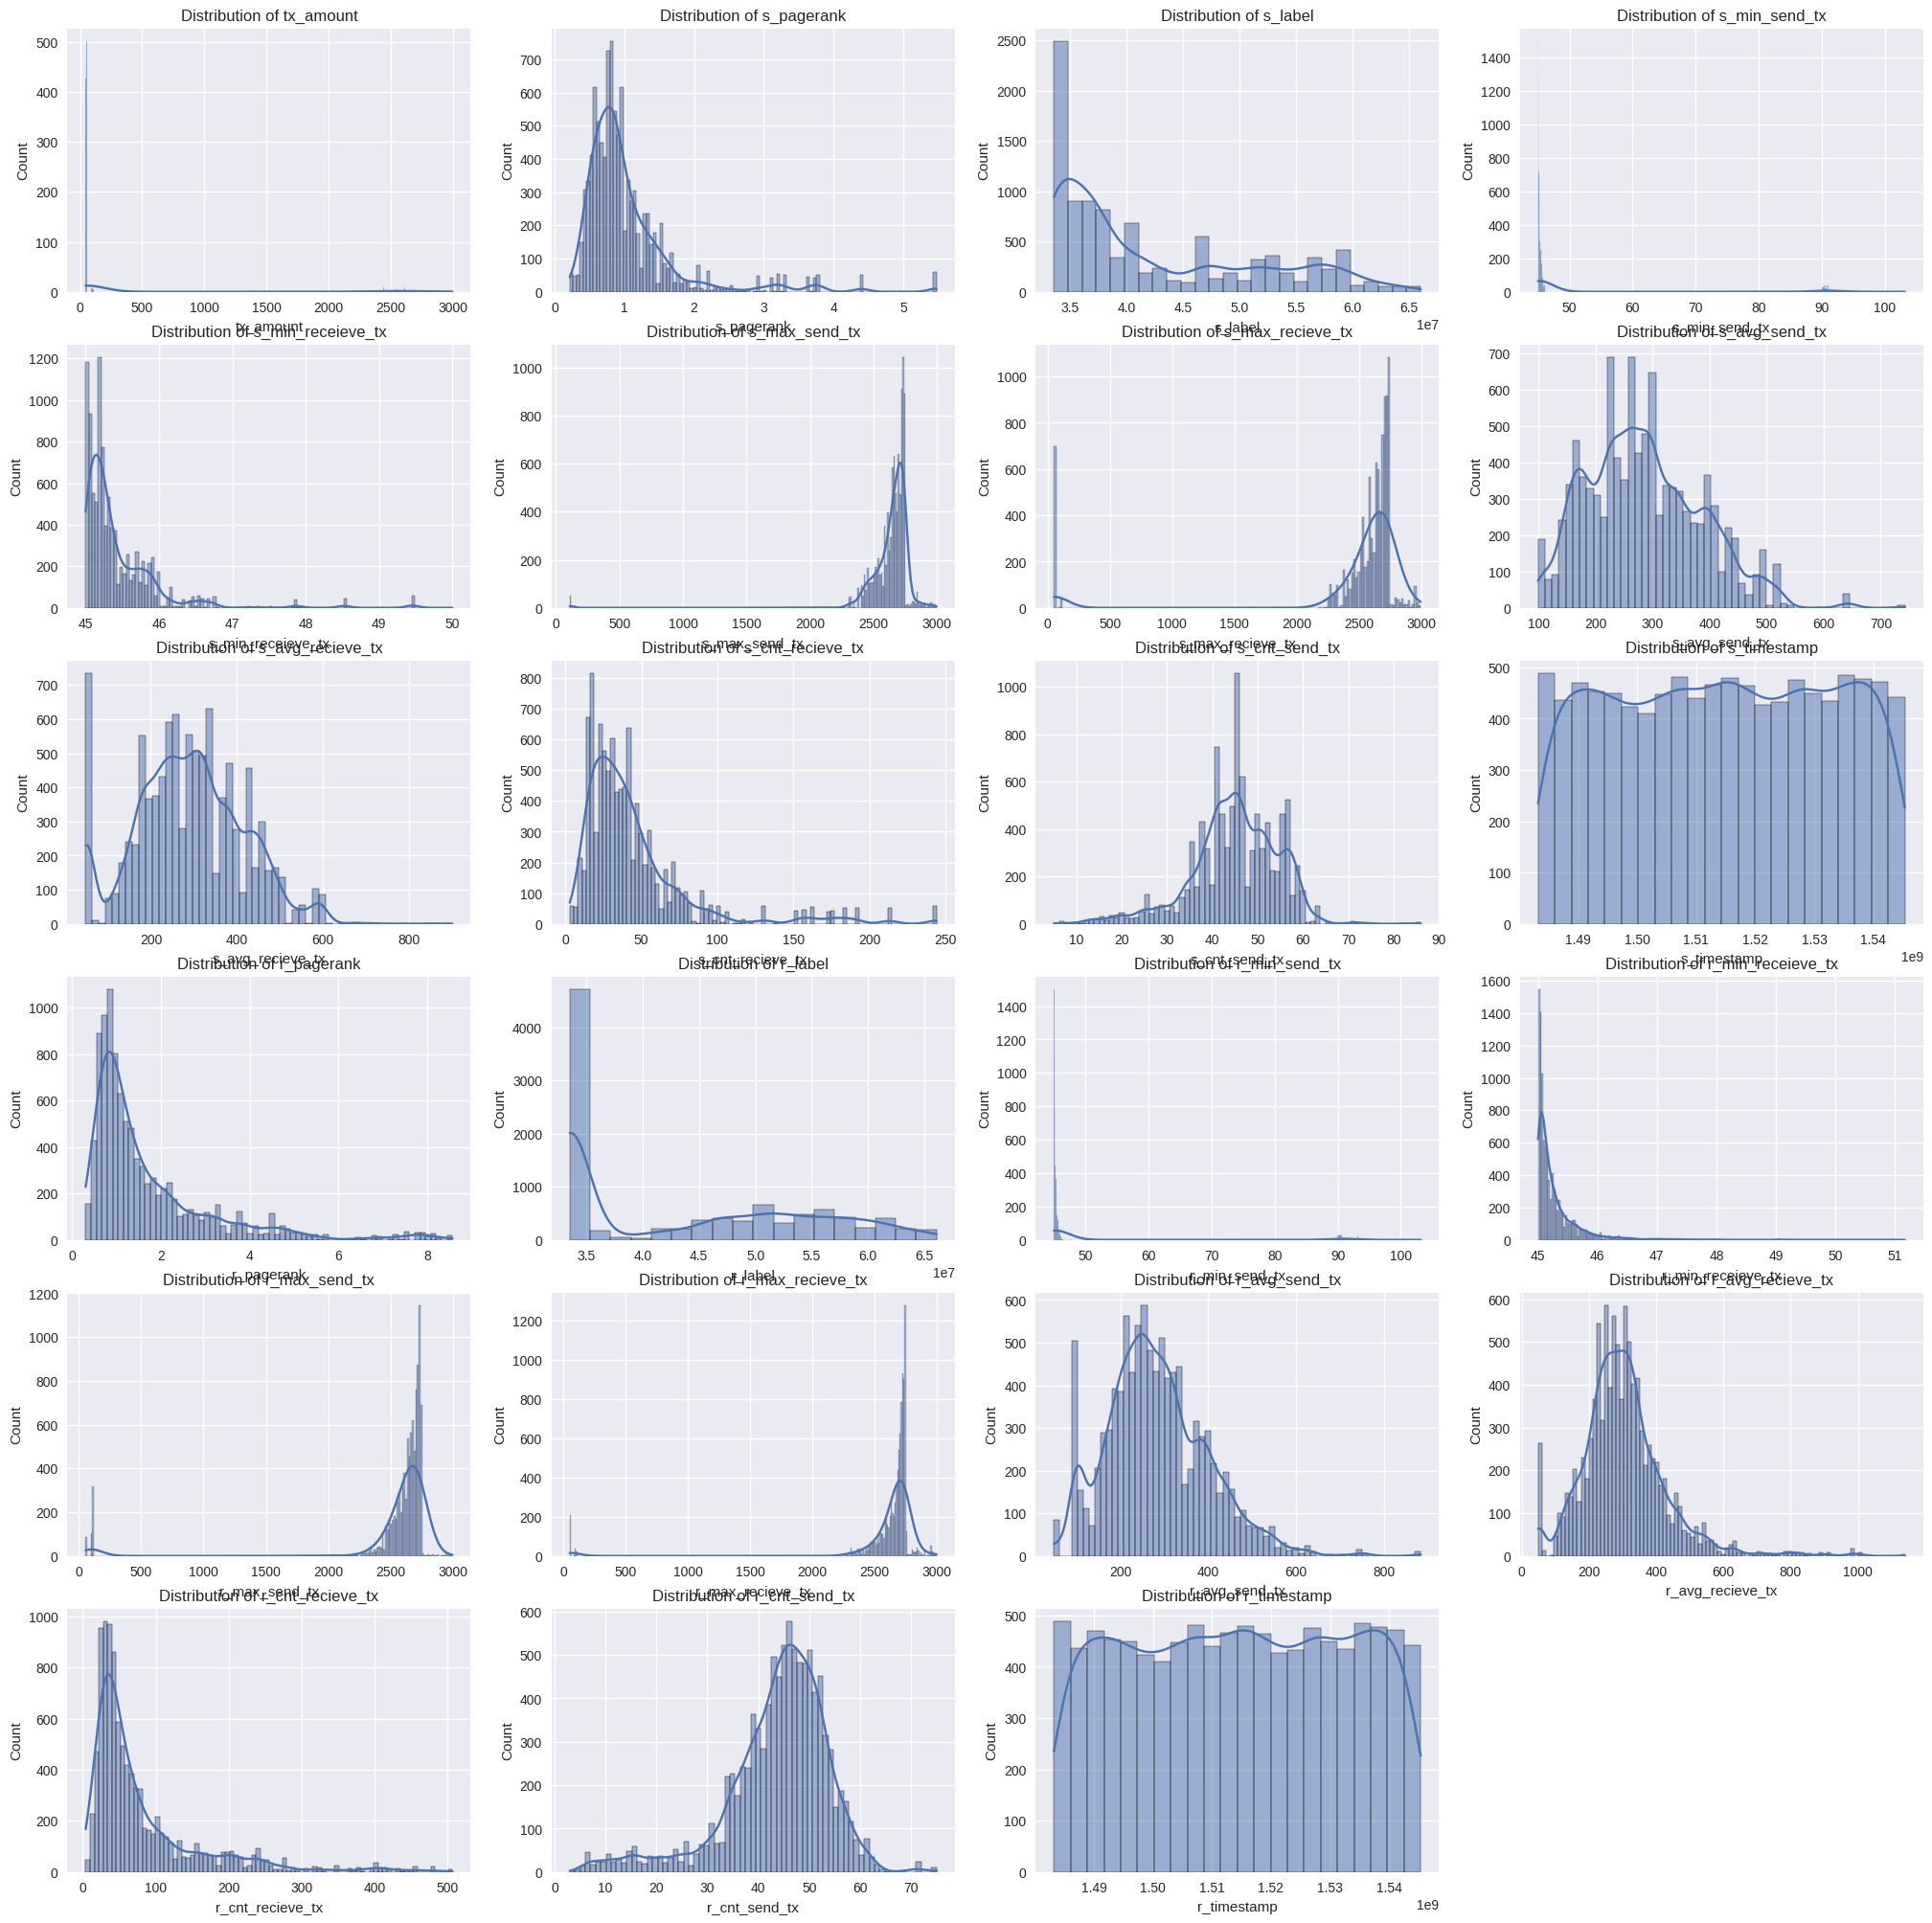

In [ ]:
plt.style.use("seaborn")
plt.subplots_adjust(top=0.9,hspace=6,wspace = 1)
plt.figure(figsize=(25,25))
plt.subplot(6,4,1)
i=1
for feature in fraud.columns:
    if feature  in numerical_features :
        plt.subplot(6,4,i)
        sns.histplot(data=fraud, x=feature, kde=True)
        plt.title("Distribution of {}".format(feature))
        i+=1

<ipython-input-26-59d2164991cf>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<Figure size 800x550 with 0 Axes>

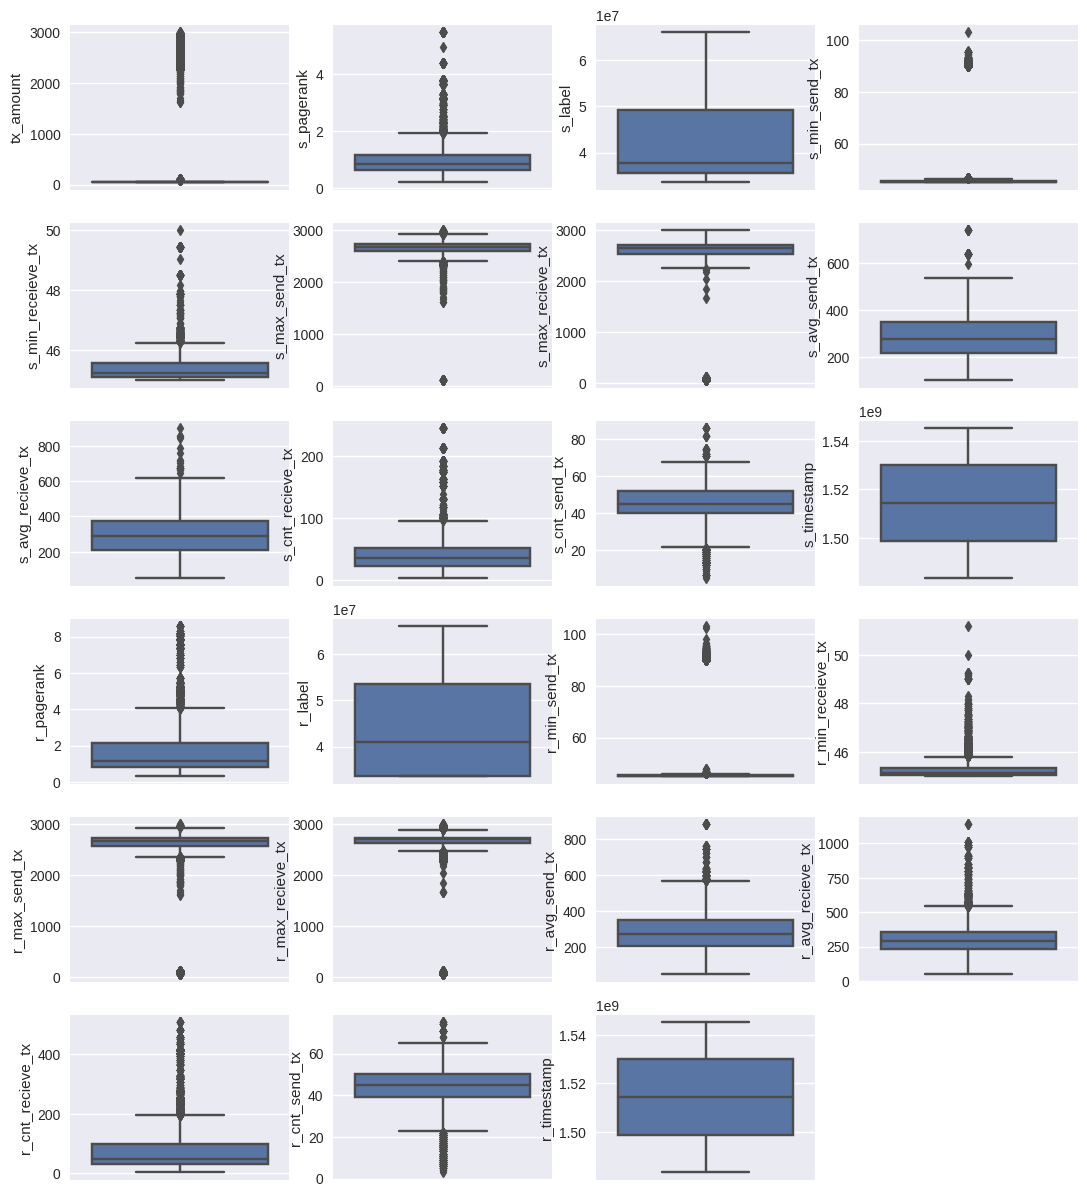

In [ ]:
#to find wheather it has outlier using box plot
plt.style.use("seaborn")
plt.subplots_adjust(hspace=0.6,wspace = 0.4)
plt.figure(figsize=(13,15))
plt.subplot(6,4,1)
i=1
for feature in fraud.columns:
    if feature  in numerical_features :
        plt.subplot(6,4,i)
        sns.boxplot(y=fraud[feature])
        i+=1

In [ ]:
temp=fraud.copy()

In [ ]:
temp.columns

Index(['tx_fraud', 'tx_amount', 's_pagerank', 's_label', 's_min_send_tx',
       's_min_receieve_tx', 's_max_send_tx', 's_max_recieve_tx',
       's_avg_send_tx', 's_avg_recieve_tx', 's_cnt_recieve_tx',
       's_cnt_send_tx', 's_timestamp', 'r_pagerank', 'r_label',
       'r_min_send_tx', 'r_min_receieve_tx', 'r_max_send_tx',
       'r_max_recieve_tx', 'r_avg_send_tx', 'r_avg_recieve_tx',
       'r_cnt_recieve_tx', 'r_cnt_send_tx', 'r_timestamp'],
      dtype='object')

In [ ]:
#shapiro test to check the normality on the basis hypothesis
for variable in numerical_features:
  stat, p = stats.shapiro(temp[variable])

  alpha = 0.05
  if p > alpha:
      print('"{}" looks normally distributed (fail to reject H0)'.format(variable))
  else:
      print('"{}" does not look normally distributed (reject H0)'.format(variable))
  print(" ")

"tx_amount" does not look normally distributed (reject H0)
 
"s_pagerank" does not look normally distributed (reject H0)
 
"s_label" does not look normally distributed (reject H0)
 
"s_min_send_tx" does not look normally distributed (reject H0)
 
"s_min_receieve_tx" does not look normally distributed (reject H0)
 
"s_max_send_tx" does not look normally distributed (reject H0)
 
"s_max_recieve_tx" does not look normally distributed (reject H0)
 
"s_avg_send_tx" does not look normally distributed (reject H0)
 
"s_avg_recieve_tx" does not look normally distributed (reject H0)
 
"s_cnt_recieve_tx" does not look normally distributed (reject H0)
 
"s_cnt_send_tx" does not look normally distributed (reject H0)
 
"s_timestamp" does not look normally distributed (reject H0)
 
"r_pagerank" does not look normally distributed (reject H0)
 
"r_label" does not look normally distributed (reject H0)
 
"r_min_send_tx" does not look normally distributed (reject H0)
 
"r_min_receieve_tx" does not look no

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# Calculate the IQR of the data
Q1 = temp['r_min_receieve_tx'].quantile(0.25)
Q3 = temp['r_min_receieve_tx'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper and lower bounds for outliers
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

# Identify the outliers in the dataframe
outliers = temp[(temp['r_min_receieve_tx'] < lower_bound) | (temp['r_min_receieve_tx'] > upper_bound)].dropna()

# Delete the outliers from the dataframe
temp= temp.drop(outliers.index)

<ipython-input-31-6dae98de1531>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<Figure size 800x550 with 0 Axes>

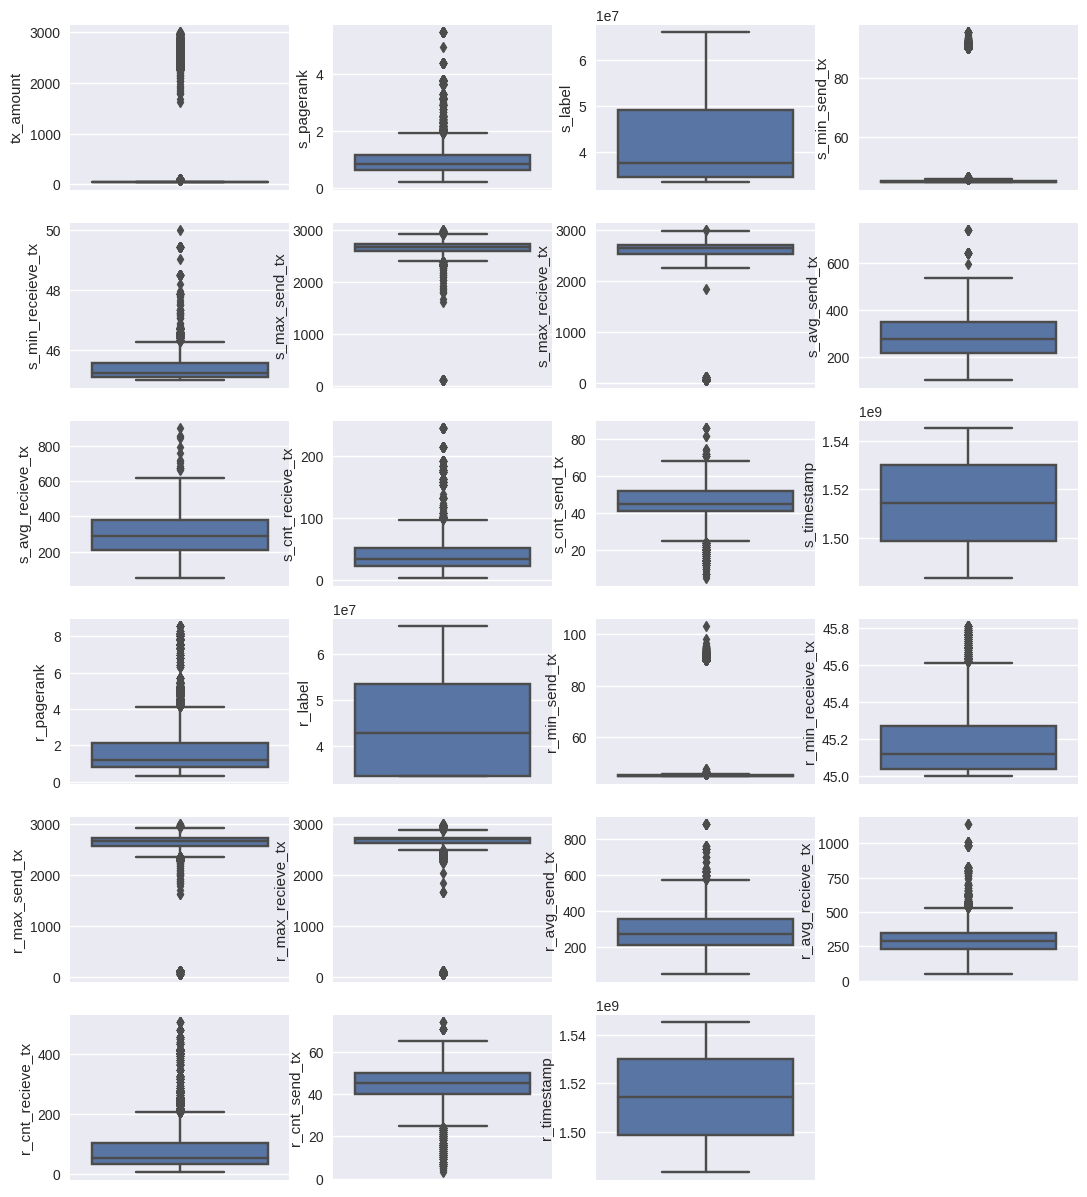

In [ ]:
plt.style.use("seaborn")
plt.subplots_adjust(hspace=0.6,wspace = 0.4)
plt.figure(figsize=(13,15))
plt.subplot(6,4,1)
i=1
for feature in temp.columns:
    if feature  in numerical_features :
        plt.subplot(6,4,i)
        sns.boxplot(y=temp[feature])
        i+=1

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(temp)

DBSCAN()

In [ ]:
outliers = temp[dbscan.labels_ == -1]
print(outliers)

      tx_fraud  tx_amount  s_pagerank   s_label  s_min_send_tx  \
2            1    2844.06     0.70773  34603485          90.30   
3            1    2523.37     2.55504  49283515          91.41   
4            1    2745.06     1.35612  55574890          90.66   
5            1    2670.20     1.93207  45088883          95.32   
6            1    2663.40     1.89045  40894894          91.17   
...        ...        ...         ...       ...            ...   
10002        0      52.17     0.52336  34603157          45.15   
10003        0      45.33     0.52336  34603157          45.15   
10004        0      47.77     0.52336  34603157          45.15   
10005        0      50.02     0.52336  34603157          45.15   
10006        0      49.59     0.52336  34603157          45.15   

       s_min_receieve_tx  s_max_send_tx  s_max_recieve_tx  s_avg_send_tx  \
2                  48.52        2844.06             54.41      159.08872   
3                  45.03        2523.37           2803.

<Figure size 1600x600 with 0 Axes>

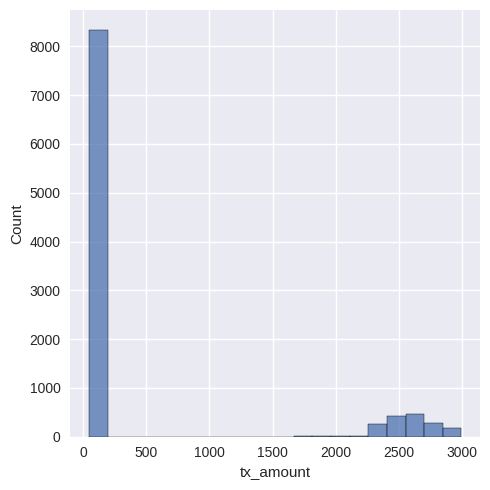

In [ ]:
plt.figure(figsize=(16,6))
sns.displot(fraud['tx_amount'],kde=False, bins=20)
plt.show()

<ipython-input-36-94a53ad4d2e2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud['tx_amount'])


<Axes: xlabel='tx_amount', ylabel='Density'>

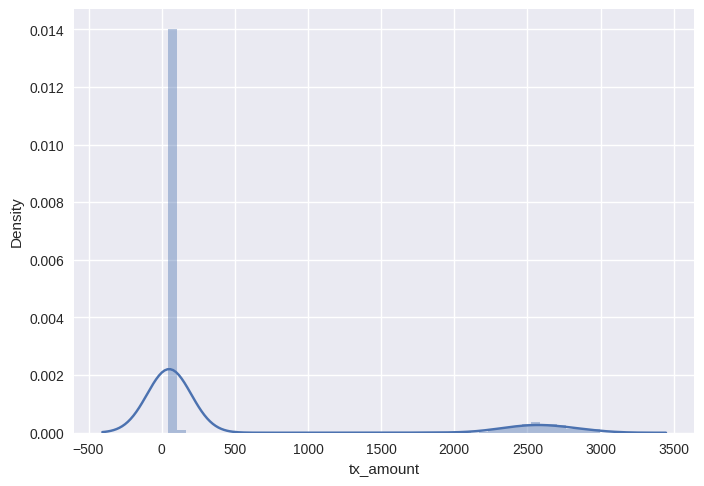

In [ ]:
sns.distplot(fraud['tx_amount'])

In [ ]:
fraud.corr()

<ipython-input-37-a94b959ed6e7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fraud.corr()


,tx_amount,s_pagerank,s_label,s_min_send_tx,s_min_receieve_tx,s_max_send_tx,s_max_recieve_tx,s_avg_send_tx,s_avg_recieve_tx,s_cnt_recieve_tx,...,r_label,r_min_send_tx,r_min_receieve_tx,r_max_send_tx,r_max_recieve_tx,r_avg_send_tx,r_avg_recieve_tx,r_cnt_recieve_tx,r_cnt_send_tx,r_timestamp
tx_amount,1.000000,0.143529,0.173935,0.593178,0.046918,0.069451,0.010388,0.093130,-0.002208,-0.035744,...,0.123945,0.565015,0.161302,-0.350562,0.102211,-0.161444,0.194369,-0.093149,-0.297301,0.032638
s_pagerank,0.143529,1.000000,0.504309,0.231999,-0.230976,-0.071691,0.222697,-0.037491,0.046113,0.906202,...,0.051682,0.184585,0.117665,-0.186661,-0.047725,-0.069439,0.049662,-0.094659,-0.129065,0.001399
s_label,0.173935,0.504309,1.000000,0.257571,-0.105314,-0.042501,0.150318,0.002926,0.043619,0.428148,...,0.061493,0.212354,0.101841,-0.143800,0.023481,-0.058956,0.061278,-0.071089,-0.131670,0.012250
s_min_send_tx,0.593178,0.231999,0.257571,1.000000,0.159735,-0.149008,-0.012183,-0.081314,-0.051808,-0.057561,...,0.216299,0.858334,0.208752,-0.520732,0.071065,-0.229022,0.107271,-0.119315,-0.459526,0.035678
s_min_receieve_tx,0.046918,-0.230976,-0.105314,0.159735,1.000000,0.019972,-0.288762,-0.011640,-0.125810,-0.321609,...,0.048200,0.145267,-0.026680,-0.096555,0.013007,-0.085043,-0.038297,0.075525,-0.120456,0.009287
s_max_send_tx,0.069451,-0.071691,-0.042501,-0.149008,0.019972,1.000000,-0.071580,0.291465,0.010785,-0.017099,...,-0.044638,-0.009130,0.016588,0.044989,0.063995,0.026105,0.023903,0.002558,0.068453,-0.005298
s_max_recieve_tx,0.010388,0.222697,0.150318,-0.012183,-0.288762,-0.071580,1.000000,0.043072,0.576414,0.252000,...,-0.035052,-0.018728,0.053468,-0.059104,-0.018977,0.009803,0.062190,-0.055241,-0.048442,-0.000060
s_avg_send_tx,0.093130,-0.037491,0.002926,-0.081314,-0.011640,0.291465,0.043072,1.000000,0.099477,-0.006024,...,-0.058814,-0.051886,0.009630,0.030726,0.042413,-0.040749,0.099469,-0.013019,-0.015742,0.004036
s_avg_recieve_tx,-0.002208,0.046113,0.043619,-0.051808,-0.125810,0.010785,0.576414,0.099477,1.000000,0.056988,...,-0.047953,-0.041528,-0.008492,0.017598,0.013533,0.038839,0.060682,-0.029110,-0.022891,0.007571
s_cnt_recieve_tx,-0.035744,0.906202,0.428148,-0.057561,-0.321609,-0.017099,0.252000,-0.006024,0.056988,1.000000,...,-0.009774,-0.067669,0.060566,-0.063204,-0.068012,-0.013072,0.013080,-0.046590,0.000402,-0.009055


<Axes: xlabel='tx_fraud', ylabel='tx_amount'>

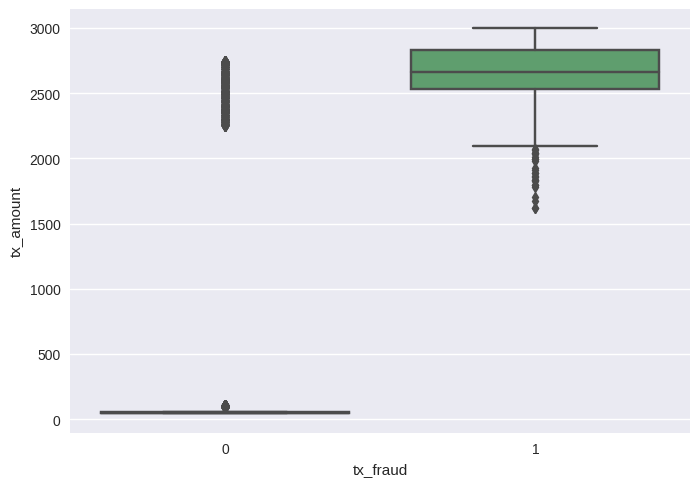

In [ ]:
sns.boxplot(x='tx_fraud', y='tx_amount', data=fraud) #less amount fraud is paid off instead of more amount

In [ ]:
from datetime import datetime

In [ ]:
fraud['r_datetime'] = [datetime.fromtimestamp(int(timestamp)) for timestamp in fraud['r_timestamp']]
fraud['s_datetime'] = [datetime.fromtimestamp(int(timestamp)) for timestamp in fraud['s_timestamp']]

In [ ]:
def drop_columns(fraud, columns):
    fraud = fraud.drop(columns, axis=1)
    return fraud

In [ ]:
fraud.columns

Index(['tx_fraud', 'tx_amount', 's_pagerank', 's_label', 's_min_send_tx',
       's_min_receieve_tx', 's_max_send_tx', 's_max_recieve_tx',
       's_avg_send_tx', 's_avg_recieve_tx', 's_cnt_recieve_tx',
       's_cnt_send_tx', 's_timestamp', 'r_pagerank', 'r_label',
       'r_min_send_tx', 'r_min_receieve_tx', 'r_max_send_tx',
       'r_max_recieve_tx', 'r_avg_send_tx', 'r_avg_recieve_tx',
       'r_cnt_recieve_tx', 'r_cnt_send_tx', 'r_timestamp', 'r_datetime',
       's_datetime'],
      dtype='object')

In [ ]:
fraud = drop_columns(fraud, ['r_timestamp','s_timestamp'])

In [ ]:
fraud['r_year'] = fraud['r_datetime'].apply(lambda date: date.year)
fraud['r_month'] = fraud['r_datetime'].apply(lambda date: date.month)

In [ ]:
fraud['s_year'] = fraud['s_datetime'].apply(lambda date: date.year)
fraud['s_month'] = fraud['s_datetime'].apply(lambda date: date.month)

In [ ]:
fraud = drop_columns(fraud, ['r_datetime','s_datetime'])

In [ ]:
fraud.shape

(10007, 26)

In [ ]:
fraud['s_month'].value_counts()

1     922
10    914
8     882
5     864
3     856
6     831
9     826
4     811
11    803
7     795
2     752
12    751
Name: s_month, dtype: int64

In [ ]:
def check_columns_equality(df, column1, column2):
    return df[column1].equals(df[column2])

In [ ]:
result = check_columns_equality(fraud, 's_month', 'r_month')
result1 = check_columns_equality(fraud, 's_year', 'r_year')
print(result)
print(result1)

True
True


In [ ]:
fraud = drop_columns(fraud, ['s_month','s_year'])

In [ ]:
fraud = fraud.rename(columns={'r_month': 'month', 'r_year': 'year'})

<Axes: xlabel='month', ylabel='tx_amount'>

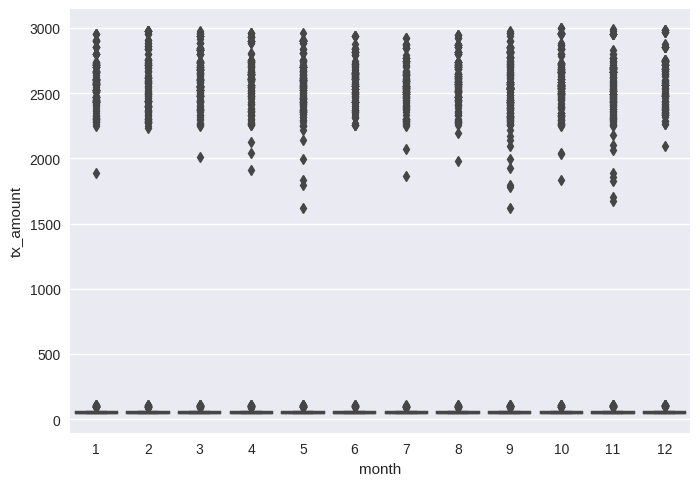

In [ ]:
sns.boxplot(x='month',y='tx_amount',data=fraud)

<ipython-input-54-7d2d7c3241ed>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fraud.groupby('month').mean()['tx_amount'].plot()


<Axes: xlabel='month'>

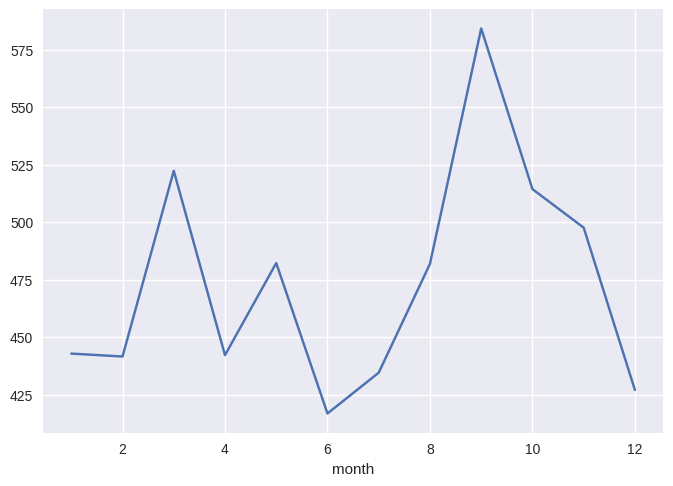

In [ ]:
fraud.groupby('month').mean()['tx_amount'].plot()

<ipython-input-55-163c72a862f7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fraud.groupby('year').mean()['tx_amount'].plot()


<Axes: xlabel='year'>

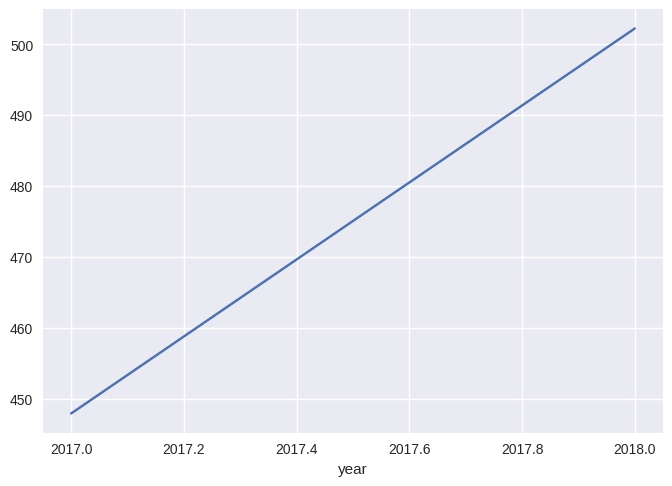

In [ ]:
fraud.groupby('year').mean()['tx_amount'].plot()

<Axes: xlabel='month', ylabel='count'>

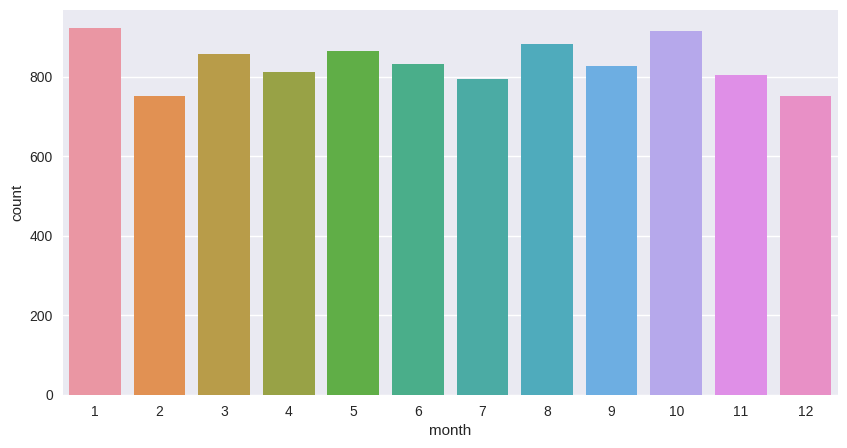

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='month', data=fraud)

In [ ]:
fraud.groupby('tx_fraud')['tx_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
tx_fraud,,,,,,,,
0,9200.0,283.413718,719.578705,45.00,47.86,50.69,53.45,2748.91
1,807.0,2657.684164,226.678163,1617.38,2534.12,2665.72,2832.86,2996.94


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, f1_score

In [ ]:
fraud['tx_fraud']=fraud[['tx_fraud']].astype('int')

In [ ]:
#for dependent and independent variables for training the model
X = fraud.drop('tx_fraud', axis = 1)
y = fraud[['tx_fraud']]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
  model = Sequential()

  model.add(Dense(units = 78, activation="relu"))
  model.add(Dropout(0.2))

  model.add(Dense(units = 39, activation="relu"))
  model.add(Dropout(0.2))

  model.add(Dense(units = 19, activation="relu"))
  model.add(Dropout(0.2))

  model.add(Dense(units = 1,activation="sigmoid")) #Binary classification 0 or 1

  model.compile(optimizer = "adam", loss = "binary_crossentropy")

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,
          epochs=400)

Epoch 1/400
63/63 [==============================] - 0s 7ms/step - loss: 6.8181e-10 - val_loss: 9.5583e-15
Epoch 2/400
63/63 [==============================] - 0s 6ms/step - loss: 1.5077e-08 - val_loss: 9.3690e-15
Epoch 3/400
63/63 [==============================] - 0s 6ms/step - loss: 2.3530e-09 - val_loss: 9.2966e-15
Epoch 4/400
63/63 [==============================] - 0s 6ms/step - loss: 1.2004e-09 - val_loss: 9.2754e-15
Epoch 5/400
63/63 [==============================] - 0s 5ms/step - loss: 1.6292e-09 - val_loss: 9.2190e-15
Epoch 6/400
63/63 [==============================] - 0s 3ms/step - loss: 2.5400e-09 - val_loss: 9.1141e-15
Epoch 7/400
63/63 [==============================] - 0s 4ms/step - loss: 4.2292e-09 - val_loss: 8.8833e-15
Epoch 8/400
63/63 [==============================] - 0s 4ms/step - loss: 2.1607e-09 - val_loss: 8.8357e-15
Epoch 9/400
63/63 [==============================] - 0s 4ms/step - loss: 4.6533e-08 - val_loss: 9.8268e-15
Epoch 10/400
63/63 [=================

In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

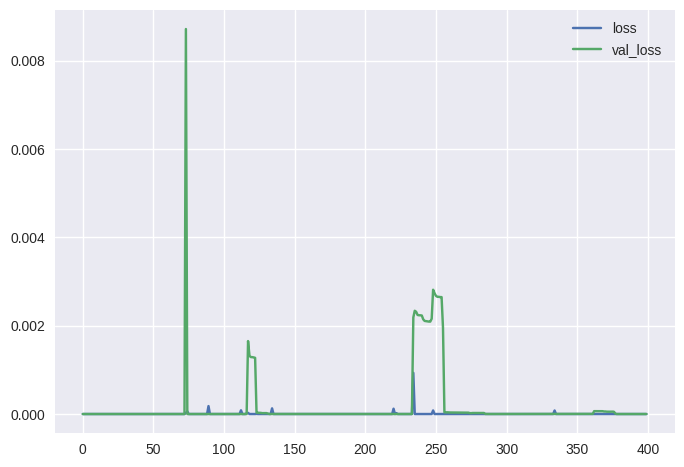

In [ ]:
losses.plot()

In [ ]:
test_predictions = model.predict(X_test)
test_predictions = np.round(test_predictions)

63/63 [==============================] - 0s 3ms/step


Confusion Matrix:
[[1825    0]
 [   0  177]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1825
           1       1.00      1.00      1.00       177

    accuracy                           1.00      2002
   macro avg       1.00      1.00      1.00      2002
weighted avg       1.00      1.00      1.00      2002



Accuracy: 1.0


Precision: 1.0
Recall: 1.0
f1 score: 1.0
1.0


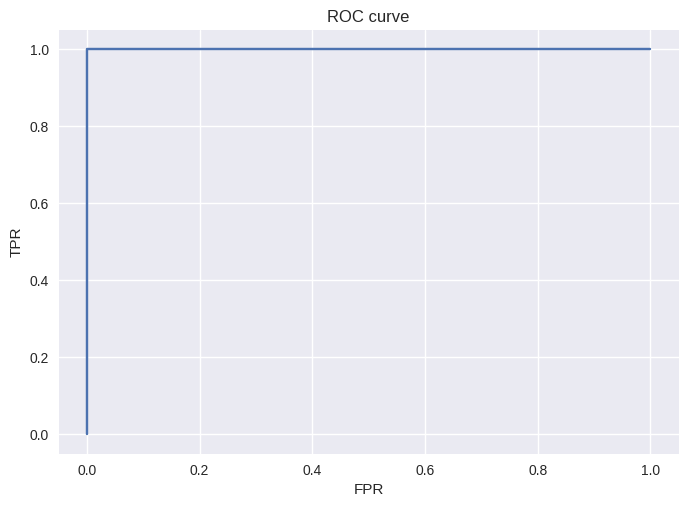

In [ ]:
result = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(result)
print('\n')
result1 = classification_report(y_test, test_predictions)
print("Classification Report:",)
print (result1)
print('\n')
result2 = accuracy_score(y_test,test_predictions)
print("Accuracy:",result2)
print('\n')
# calculate precision and recall scores
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1score = f1_score(y_test, test_predictions)

# print the results
print("Precision:", precision)
print("Recall:", recall)
print("f1 score:", recall)

print(roc_auc_score(y_test, test_predictions))

fpr, tpr, _ = roc_curve(y_test, test_predictions)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [ ]:
#SelectKBest is a feature selection method in machine learning used to select the top K most important features from a dataset
def featureSelect_dataframe(X, y, criteria, k):
  reg = SelectKBest(criteria, k=k).fit(X,y)
  X_transformed = reg.transform(X)
  X = X[[val for i,val in enumerate(X.columns) if reg.get_support()[i]]]
  return X

New_X = featureSelect_dataframe(X_train, y_train, f_classif, 8)

New_X

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,tx_amount,s_label,s_min_send_tx,s_cnt_send_tx,r_min_send_tx,r_max_send_tx,r_avg_send_tx,r_cnt_send_tx
7864,47.29,33554526,45.01,38,45.21,2666.90,464.10800,30
1095,49.52,58720332,45.35,45,45.16,2709.10,261.73562,48
3125,52.28,40894825,45.40,46,45.06,2728.71,229.86279,43
9860,46.61,48234527,45.47,43,45.22,2720.83,275.69022,45
1561,48.35,36700402,45.22,38,45.00,2544.37,314.47867,45
...,...,...,...,...,...,...,...,...
5734,51.97,40894707,45.00,51,45.32,2614.25,234.12135,52
5191,45.51,37748840,45.33,38,45.24,2671.79,379.20178,45
5390,52.95,35651681,45.08,59,45.32,2722.82,554.11564,39
860,2412.83,56623717,45.51,47,45.00,2450.02,192.76740,50


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10007 entries, 0 to 10006
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tx_fraud           10007 non-null  int64  
 1   tx_amount          10007 non-null  float64
 2   s_pagerank         10007 non-null  float64
 3   s_label            10007 non-null  int64  
 4   s_min_send_tx      10007 non-null  float64
 5   s_min_receieve_tx  10007 non-null  float64
 6   s_max_send_tx      10007 non-null  float64
 7   s_max_recieve_tx   10007 non-null  float64
 8   s_avg_send_tx      10007 non-null  float64
 9   s_avg_recieve_tx   10007 non-null  float64
 10  s_cnt_recieve_tx   10007 non-null  int64  
 11  s_cnt_send_tx      10007 non-null  int64  
 12  s_timestamp        10007 non-null  int64  
 13  r_pagerank         10007 non-null  float64
 14  r_label            10007 non-null  int64  
 15  r_min_send_tx      10007 non-null  float64
 16  r_min_receieve_tx  100

In [ ]:
dtree = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
dtree.fit(X_train,y_train)

<ipython-input-89-97e56a26e4dc>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dtree.fit(X_train,y_train)


RandomForestClassifier(random_state=42)

In [ ]:
X_train.shape

(8005, 23)

In [ ]:
pred=dtree.predict(X_test)

Confusion Matrix:
[[1825    0]
 [   0  177]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1825
           1       1.00      1.00      1.00       177

    accuracy                           1.00      2002
   macro avg       1.00      1.00      1.00      2002
weighted avg       1.00      1.00      1.00      2002



Accuracy: 1.0


Precision: 1.0
Recall: 1.0
f1 score: 1.0
1.0


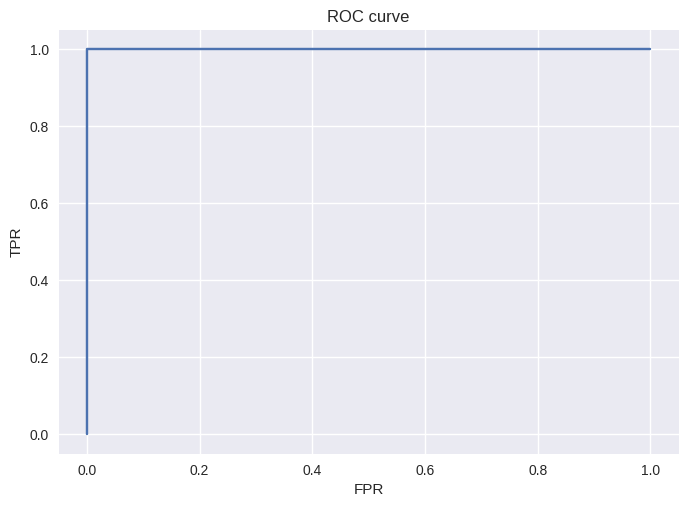

In [ ]:
result = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(result)
print('\n')
result1 = classification_report(y_test, pred)
print("Classification Report:",)
print (result1)
print('\n')
result2 = accuracy_score(y_test,pred)
print("Accuracy:",result2)
print('\n')
f1score = f1_score(y_test, pred)

# calculate precision and recall scores
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)

# print the results
print("Precision:", precision)
print("Recall:", recall)
print("f1 score:", recall)


print(roc_auc_score(y_test, pred))

fpr, tpr, _ = roc_curve(y_test, pred)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()